In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['autos.csv', 'cnt_km_year_powerPS_minPrice_maxPrice_avgPrice_sdPrice.csv']


# Exploring Ebay Car Sales Data
## Used car database for this project is from [kaggle](https://www.kaggle.com/orgesleka/used-cars-database)

## Reading data

In [3]:
import csv
autos = pd.read_csv('../input/autos.csv', header=0, encoding='cp1252')
autos.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

## Data Cleaning

In [5]:
autos.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [6]:
autos['dateCrawled'] = pd.to_datetime(autos['dateCrawled'])
autos['dateCreated'] = pd.to_datetime(autos['dateCreated'])
autos['lastSeen'] = pd.to_datetime(autos['lastSeen'])

It shows that there are `NaN` values in `vehicleType`,  `gearbox`, `model`,  `fuelType` and `notRepairedDamage` columns.     

In [7]:
print("Vehicle Type: ", autos.vehicleType.unique())
print("Gearbox: ", autos.gearbox.unique())
print("Model: ", autos.model.unique()[:5])
print("Fuel Type: ", autos.fuelType.unique())
print("Damaged: ", autos.notRepairedDamage.unique())

Vehicle Type:  [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
Gearbox:  ['manuell' 'automatik' nan]
Model:  ['golf' nan 'grand' 'fabia' '3er']
Fuel Type:  ['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
Damaged:  [nan 'ja' 'nein']


Since columns `gearbox` and`notRepairedDamage` only have two unique values, only keep values that's not null.     
For other columns, save not known data value as "Not Known"

In [8]:
autos.loc[autos.vehicleType.isnull(), 'vehicleType'] = 'Not_Known'
autos.loc[autos.model.isnull(), 'model'] = 'Not_Known'
autos.loc[autos.fuelType.isnull(), 'fuelType'] = 'Not_Known'

In [9]:
autos_modified = autos[pd.notnull(autos['gearbox'])]
autos_modified = autos_modified[pd.notnull(autos_modified['notRepairedDamage'])]

In [10]:
autos_modified.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

Now all the `NaN` values are cleared and we're ready to start analysis.

In [11]:
autos_modified.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,Not_Known,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05 18:18:39


## Data Analysis

### Distribution of features of cars

In [12]:
autos_modified.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,2.921960e+05,292196.000000,292196.000000,292196.000000,292196.000000,292196.0,292196.000000
mean,1.618499e+04,2003.768864,124.379766,124599.686512,6.059830,0.0,51421.511325
std,3.995014e+06,25.926686,172.900874,39828.184069,3.537687,0.0,25877.675071
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1.400000e+03,1999.000000,75.000000,100000.000000,3.000000,0.0,30938.000000
50%,3.500000e+03,2004.000000,115.000000,150000.000000,6.000000,0.0,50672.000000
75%,8.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,72411.000000
max,2.147484e+09,9000.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [13]:
categories = autos_modified['name'].unique()
len(categories)

175336

It shows that there are a wide variey of cars (`175336` different kinds of cars) that's on sale on Ebay.   
Let's just at the 10 most common cars.

In [14]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


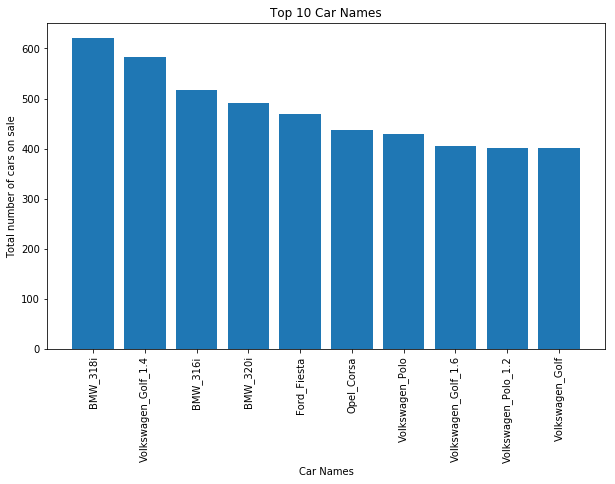

In [15]:
group_names = autos_modified.groupby(by='name')['name'].count().sort_values(ascending=False)
plt.bar(np.arange(10), group_names.head(10))
plt.xticks(np.arange(10), group_names.index, rotation=90)
plt.xlabel('Car Names')
plt.ylabel('Total number of cars on sale')
plt.title('Top 10 Car Names')
plt.show()

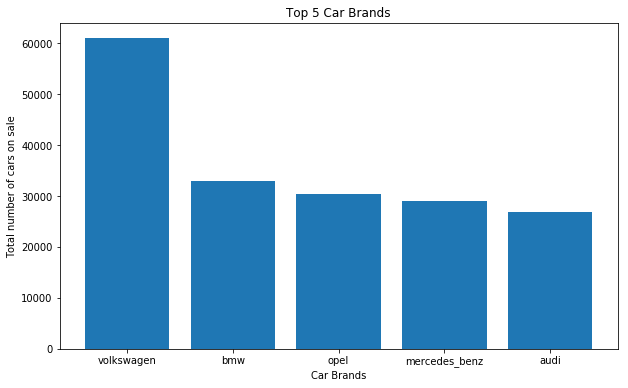

In [16]:
brands = autos_modified['brand'].unique()
group_brands = autos_modified.groupby(by='brand')['brand'].count().sort_values(ascending=False)
plt.bar(np.arange(5), group_brands.head())
plt.xticks(np.arange(5), group_brands.index)
plt.xlabel('Car Brands')
plt.ylabel('Total number of cars on sale')
plt.title('Top 5 Car Brands')
plt.show()

From above two graphs, we can say that particular types of `BMW` cars (BMW_318i, BMW_316i, BMW320i) are most common but overall `Volkswagen` cars are more popular than `BMW`(The total number of `Volkswagen` cars almost double the total number of `BMW` cars)

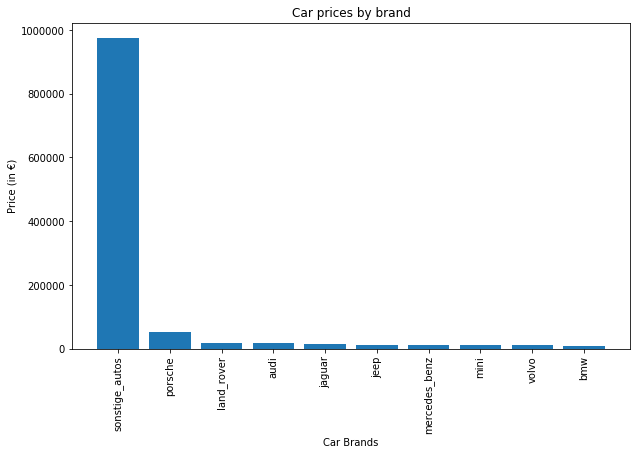

In [17]:
group_prices = autos_modified.groupby(by='brand')['price'].mean().sort_values(ascending=False)
plt.bar(np.arange(10), group_prices.head(10))
plt.xticks(np.arange(10), group_prices.index, rotation=90)
plt.xlabel('Car Brands')
plt.ylabel('Price (in €)')
plt.title('Car prices by brand')
plt.show()

From the graph above, the brand `Sonstige_autos` has extraordinarily high value of cars in average than other brands. It also tells us that there is no direct relationship between average price of cars per brand and the total number of cars per brand that's on sales on Ebay.                                             

Let's explore other features as well.

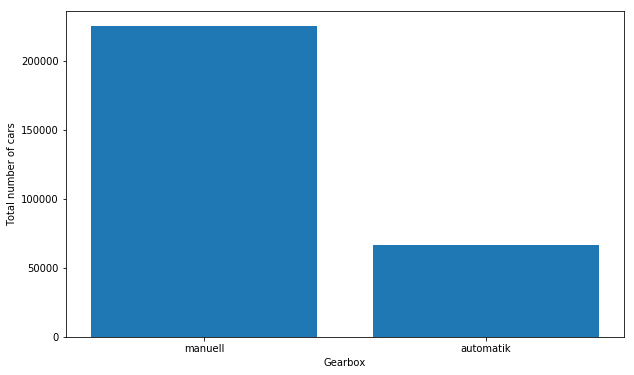

Cars with manual gearbox is 3.38 times more common than automatic gearbox


In [18]:
gearboxes = autos_modified['gearbox'].unique()
group_gearbox = autos_modified.groupby(by='gearbox')['gearbox'].count().sort_values(ascending=False)
plt.bar(np.arange(len(gearboxes)), group_gearbox)
plt.xticks(np.arange(len(gearboxes)), group_gearbox.index)
plt.xlabel('Gearbox')
plt.ylabel('Total number of cars')
plt.show()
print('Cars with manual gearbox is {:0.2f} times more common than automatic gearbox'.format(group_gearbox[0]/group_gearbox[1]))

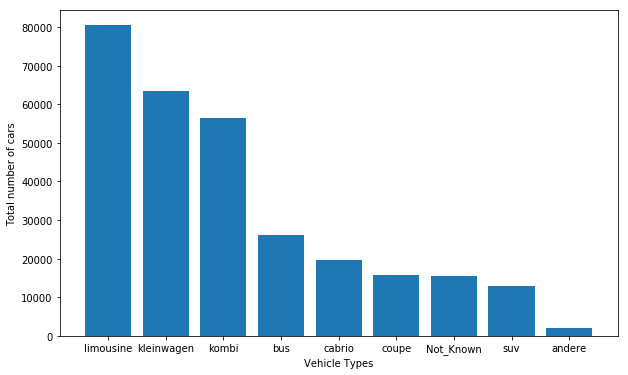

In [19]:
vehicleTypes = autos_modified['vehicleType'].unique()
group_types = autos_modified.groupby(by='vehicleType')['vehicleType'].count().sort_values(ascending=False)
plt.bar(np.arange(len(vehicleTypes)), group_types)
plt.xticks(np.arange(len(vehicleTypes)), group_types.index)
plt.xlabel('Vehicle Types')
plt.ylabel('Total number of cars')
plt.show()

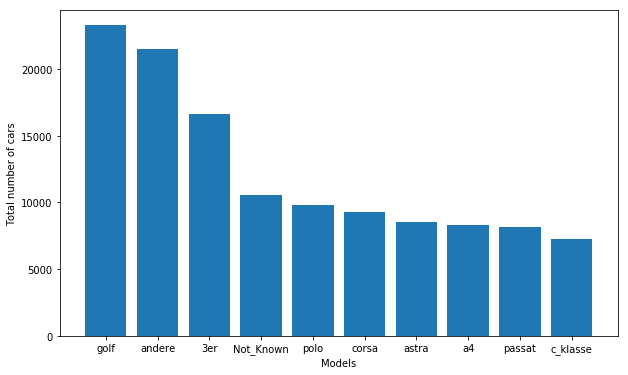

In [20]:
models = autos_modified['model'].unique()
group_models = autos_modified.groupby(by='model')['model'].count().sort_values(ascending=False)
plt.bar(np.arange(10), group_models.head(10))
plt.xticks(np.arange(10), group_models.head(10).index)
plt.xlabel('Models')
plt.ylabel('Total number of cars')
plt.show()

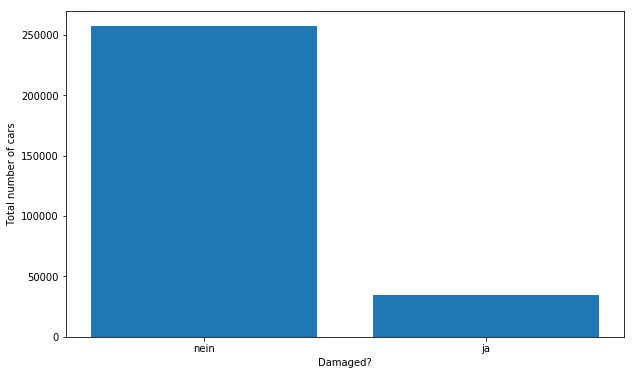

There are 86.50% more undamaged cars than damaged cars


In [21]:
damaged = autos_modified['notRepairedDamage'].unique()
group_damages = autos_modified.groupby(by='notRepairedDamage')['notRepairedDamage'].count().sort_values(ascending=False)
plt.bar(np.arange(len(damaged)), group_damages)
plt.xticks(np.arange(len(damaged)), group_damages.index)
plt.xlabel('Damaged?')
plt.ylabel('Total number of cars')
plt.show()
print('There are {:0.2f}% more undamaged cars than damaged cars'.format((group_damages[0]-group_damages[1])/group_damages[0]*100))

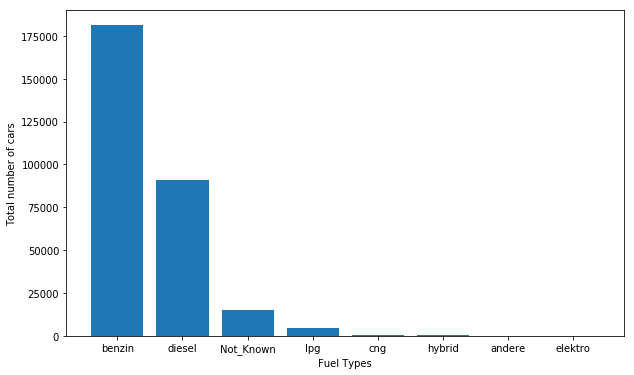

In [22]:
fuelTypes = autos_modified['fuelType'].unique()
group_fuels = autos_modified.groupby(by='fuelType')['fuelType'].count().sort_values(ascending=False)
plt.bar(np.arange(len(fuelTypes)), group_fuels)
plt.xticks(np.arange(len(fuelTypes)), group_fuels.index)
plt.xlabel('Fuel Types')
plt.ylabel('Total number of cars')
plt.show()

### Correlation

Now, let's see if several features of cars are correlated.

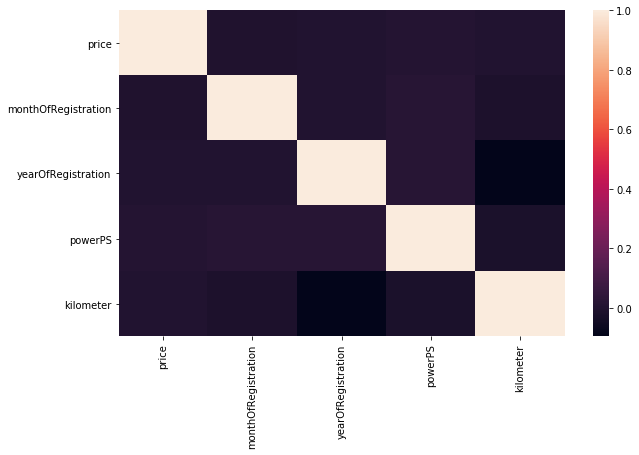

In [23]:
labels = ['price','monthOfRegistration','yearOfRegistration','powerPS','kilometer']
ax = sns.heatmap(autos_modified[labels].corr())

I am not sure what does correlation above tells us... Correlations between above features are all pretty low.

## Furthermore...
In this project, we've imported data, cleaned and analyzed them.       
To explore this project further, we can answer following questions:
- Any trends in car sales by month or by year?
- Correlations between price and all other features?
- Can we predict future trends or car prices regarding car features?